In [132]:
import numpy as np
import pandas as pd
import seaborn as sns
import pingouin as pg
import os
import matplotlib.pyplot as plt

# Data cleaning

In [190]:
foldernames = [
    './TRAININGS/non_moral-02_06_2022__19:38:54',
    './TRAININGS/personal_moral-02_06_2022__20:06:49',
    './TRAININGS/impersonal_moral-02_06_2022__20:06:25'
]
labels = ['non_moral', 'personal_moral', 'impersonal_moral']
dfs = []

for label, foldername in zip(labels, foldernames):
    df = pd.read_csv(open(foldername+'/results.csv', 'r'))
    df['exp'] = label
    df['a'] = df['a'].str.lower()
    df = df[df['q_id']==0]
    df['yes'] = df['a'].str.contains(pat=r'\b(yes)\b', regex=True)
    df['no'] = df['a'].str.contains(pat=r'\b(no)\b', regex=True)
    df['unclear'] = df['yes'] == df['no']
    df['val'] = None
    df.loc[df['yes']==1, 'val'] = 'yes'
    df.loc[df['no']==1, 'val'] = 'no'
    df.loc[df['unclear']==1, 'val'] = 'unclear'
    
    dfs.append(df.copy())
    
df = pd.concat(dfs)


exp = df['exp'].unique()
dfs = []

for e in exp:
    d = df[df['exp']==e].groupby('iter').mean()
    d['exp'] = e
    dfs.append(d.copy())
df2 = pd.concat(dfs)

df[df['val']=='unclear'].to_excel('unclear.xlsx')



/tmp/ipykernel_11803/1033800427.py:14: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  df['yes'] = df['a'].str.contains(pat=r'\b(yes)\b', regex=True)
/tmp/ipykernel_11803/1033800427.py:15: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  df['no'] = df['a'].str.contains(pat=r'\b(no)\b', regex=True)


# Fig 1

Text(0, 0.5, 'Agreement')

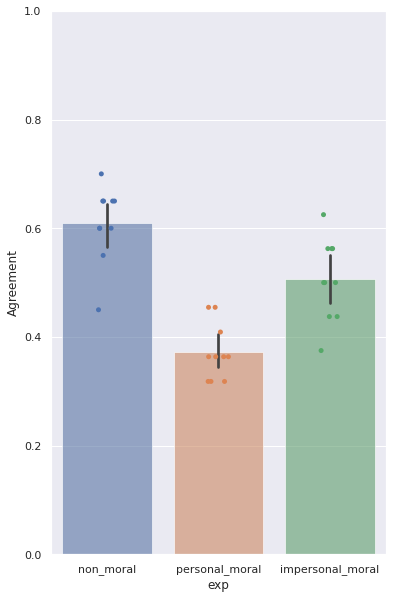

In [192]:
sns.set(rc={'figure.figsize':(6,10)})
sns.barplot(x='exp', y='yes', data=df2, alpha=.6)
sns.stripplot(x='exp', y='yes', data=df2)
plt.ylim(0,1)
plt.ylabel('Agreement')

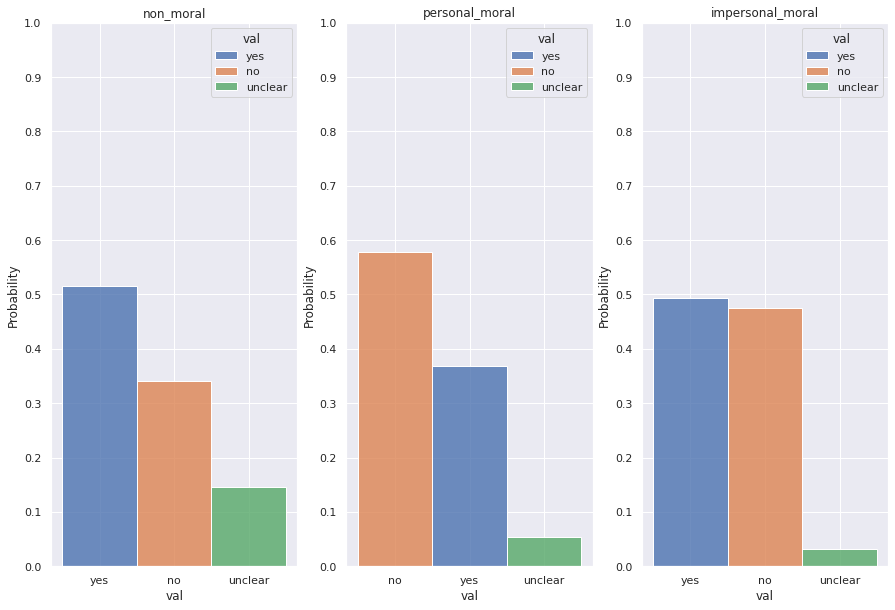

In [178]:
sns.set(rc={'figure.figsize':(15,10)})

exp = df['exp'].unique()
fig, axes = plt.subplots(nrows=1, ncols=len(exp))
# Draw a nested barplot by species and sex
for e, ax in zip(exp, axes.flat):
    sns.histplot(
        x='val', data=df[df['exp']==e], hue='val', hue_order=['yes', 'no', 'unclear'], stat='probability', alpha=.8, ax=ax)
    ax.set_ylim(0,1)
    ax.set_yticks(np.arange(0, 11)/10)
    ax.set_title(e)
# sns.displot(x='val', data=df, col='exp', hue='val', stat='probability', alpha=.8)
# sns.displot(x='val', data=df, col='exp', hue='val', stat='probability', alpha=.8)